<a href="https://colab.research.google.com/github/parthd06/Medical_Insurance_Cost_Recommendation/blob/main/medical_insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Data collection & analysis

In [ ]:
#loading the data from csv file to pandas dataframe
df=pd.read_csv('/content/insurance (1).csv')

In [ ]:
#First 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# numbers of rows & columns
df.shape

(1338, 7)

In [ ]:
# getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have 3 categorical features 
 * sex
 *smoker
 * region

In [ ]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values.

**Data Analysis**

In [ ]:
# statistical measures of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


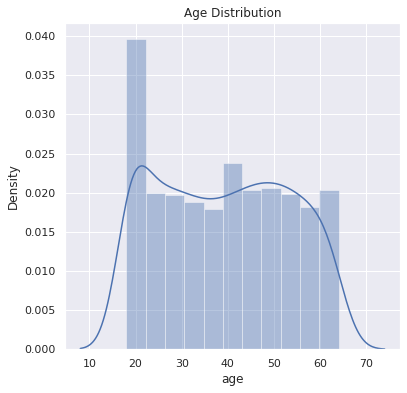

In [ ]:
# Distribution of Age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

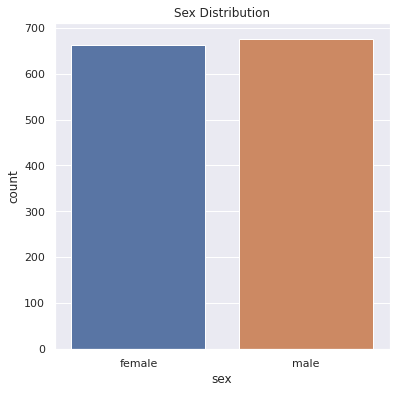

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()


In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


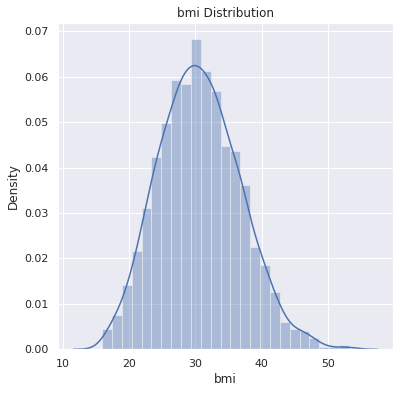

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

Normal Bmi range ---> 18.5 to 24.9 

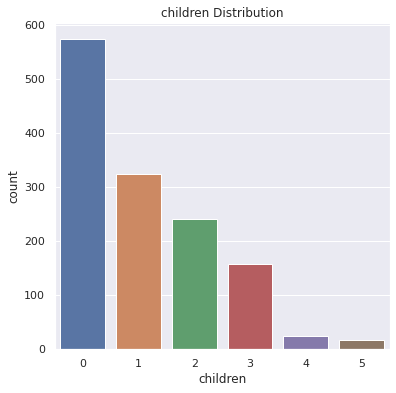

In [ ]:
#children_column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children Distribution')
plt.show()

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

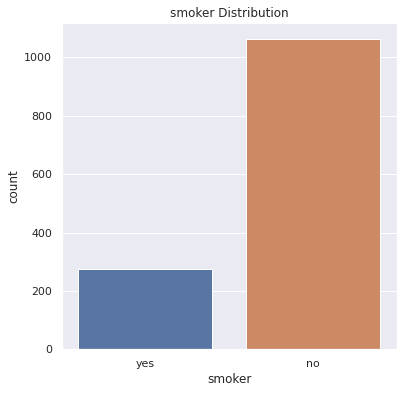

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
#smoker_column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker Distribution')
plt.show()
df['smoker'].value_counts()


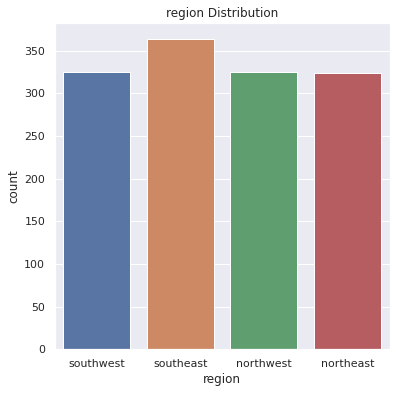

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
#region_column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('region Distribution')
plt.show()
df['region'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


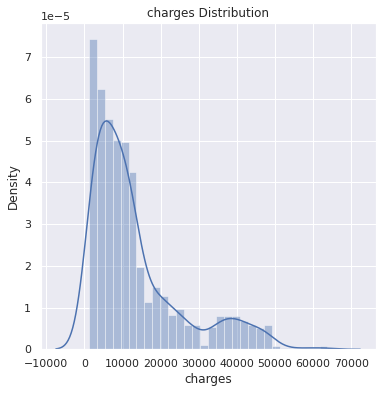

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges Distribution')
plt.show()

**Data Preprocessing**

In [ ]:
df.drop(columns='region',axis=1,inplace=True)

In [ ]:
df


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,0,16884.92400
1,18,0,33.770,1,1,1725.55230
2,28,0,33.000,3,1,4449.46200
3,33,0,22.705,0,1,21984.47061
4,32,0,28.880,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830
1334,18,1,31.920,0,1,2205.98080
1335,18,1,36.850,0,1,1629.83350
1336,21,1,25.800,0,1,2007.94500


1.Encoding the categorical features

In [ ]:
# 1. Encoding the sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)
# 2. Encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)


In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,0,16884.92400
1,18,0,33.770,1,1,1725.55230
2,28,0,33.000,3,1,4449.46200
3,33,0,22.705,0,1,21984.47061
4,32,0,28.880,0,1,3866.85520


Splitting the features and target

In [ ]:
X = df.drop(columns='charges',axis=1)
Y=df['charges']

In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 5) (1070, 5) (268, 5)


**Linear Regression model**

In [ ]:
# loading the linear regression model
regressor = LinearRegression()


In [ ]:
regressor.fit(X_train,Y_train)


LinearRegression()

Model Evaluation

In [ ]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R sqaured value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value:', r2_train)

R squared value: 0.7511416233816596


In [ ]:
# Prediction on testing data
testing_data_prediction = regressor.predict(X_test)

In [ ]:
# R sqaured value
r2_test = metrics.r2_score(Y_test,testing_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.7428803779811102


Building a Predictive system

In [ ]:
input_data = (25,0,26.22,0,1)
# changing input data  to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =regressor.predict(input_data_reshaped)
print('The insurance cost is INR',prediction[0])

The insurance cost is USD 2735.5205243150813


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# The actual value  is 2721.3208 INR , where our predicted value is almost equal to actual value.